In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [2]:
#custum uep_extraction tool
#tested with UNIFI version 1.9.xxx and data acquired in MSe-mode
import uep_extraction

In [3]:
#open uep-file
uep = uep_extraction.uepHandler('Test set.uep')

In [4]:
#list of samples in uep-file
print(f'Number of samples in uep-file: {len(uep.sample_list)}')
uep.sample_list

Number of samples in uep-file: 2


,file,name,systemName,sampleNo,sampleName,sampleId,acquisitionRunTime,acquisitionStartTime,submittedBy,replicateNumber,...,sampleType,sampleLevel,sampleWeight,dilution,injectionVolume,processingOptions,parentItemID,SubItemVersionNo,nodeID,itemID
1,Test set.uep,Test set,Frigg System,1,Blank,a560e977da51492a9b30d6cc628f13af,15,2022/11/09 10:52:14.4438439 EUROPE/PARIS,"Frigg, Frigg",1,...,Blank,None,1,1,3,NaN,NaN,NaN,bcc14d5f-d8b9-4440-b156-fbde561cd2ce,d259c603-1068-43ca-9dc7-82c3b9cf5805
3,Test set.uep,Test set,Frigg System,2,System Control,a6f9b9e22f5b4286b2e82875870fb0db,15,2022/11/09 11:07:46.9026439 EUROPE/PARIS,"Frigg, Frigg",1,...,Unknown,None,1,1,3,NaN,NaN,NaN,bcc14d5f-d8b9-4440-b156-fbde561cd2ce,6b4dced9-a908-401d-98b6-299bfe500055


In [5]:
#list of peaks in uep-file
print(f'Number of peaks in uep-file: {len(uep.peak_table)}')
uep.peak_table

Number of peaks in uep-file: 24932


,sampleId,channel,chargeClusterID,isotopeNumber,charge,massPeakID,accurateM_z,massSD,retentionTime,retentionTimeSD,...,intentsitySD,counts,countsSD,retentionTimeFWHM,liftOffRT,infUpRT,infDownRT,touchDownRT,accurate,saturated
0,a560e977da51492a9b30d6cc628f13af,1,1041,0,1,22,182.985148,0.000237,0.704554,0.000731,...,805.114685,414.484314,20.358889,0.035256,0.661379,0.679970,0.728244,0.753504,True,False
1,a560e977da51492a9b30d6cc628f13af,1,1465,0,1,23,167.012467,0.000287,0.707571,0.001117,...,594.773621,216.103851,14.700471,0.040224,0.662534,0.681037,0.732349,0.758475,True,False
2,a560e977da51492a9b30d6cc628f13af,1,1339,0,1,28,151.096461,0.000231,0.838713,0.000749,...,649.912109,245.426270,15.666086,0.027615,0.799935,0.816534,0.861707,0.879364,True,False
3,a560e977da51492a9b30d6cc628f13af,1,1376,0,1,29,173.078688,0.000233,0.840842,0.000814,...,632.815430,249.035110,15.780847,0.030674,0.800777,0.817469,0.863880,0.885702,True,False
4,a560e977da51492a9b30d6cc628f13af,1,1468,0,1,31,212.149352,0.000283,0.843539,0.000954,...,592.516418,241.716507,15.547235,0.036501,0.800610,0.819694,0.869725,0.894029,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24927,a6f9b9e22f5b4286b2e82875870fb0db,2,6818,0,1,19200,118.085406,0.000451,14.612595,0.001067,...,316.040710,51.306076,7.162826,0.018105,14.576498,14.591710,14.628988,14.643662,False,False
24928,a6f9b9e22f5b4286b2e82875870fb0db,2,7717,0,1,19204,118.086414,0.000367,14.734930,0.001030,...,256.821106,33.880211,5.820671,0.014440,14.699236,14.708927,14.743879,14.749660,True,False
24929,a6f9b9e22f5b4286b2e82875870fb0db,2,5551,0,1,19206,279.093588,0.000452,14.817109,0.001402,...,418.714203,138.450638,11.766505,0.037683,14.784483,14.799267,14.832547,14.844690,False,False
24930,a6f9b9e22f5b4286b2e82875870fb0db,2,8171,0,1,19208,201.046845,0.000569,14.870183,0.002077,...,227.894440,34.809738,5.899978,0.028984,14.832384,14.850217,14.893895,14.908430,True,False


In [6]:
#setup sqlilte database in memory for example and for testing and store samples and peaks in database
con = sqlite3.connect(":memory:")
uep.sample_list.to_sql(name='samples', con=con);
uep.peak_table.to_sql(name='peaks', con=con);

In [7]:
#all observed peaks with m/z matching Cocaine in low energy (channel 1), threoretical m/z for H+-adduct: 304.1544 +/-0.003 Da
mz = 304.1544
df = pd.read_sql(f"""
    select s.sampleName, retentionTime, accurateM_z, counts
        from peaks p
        join samples s on s.sampleId=p.sampleId
        where p.channel=1
            and abs(accurateM_z-{mz})<0.003
        """, con=con)
rt = df['retentionTime'].mean()
print(f'Observed retention time for cocaine: {rt}')
df

Observed retention time for cocaine: 4.534568786621094


,sampleName,retentionTime,accurateM_z,counts
0,System Control,4.534569,304.154655,499359.53125


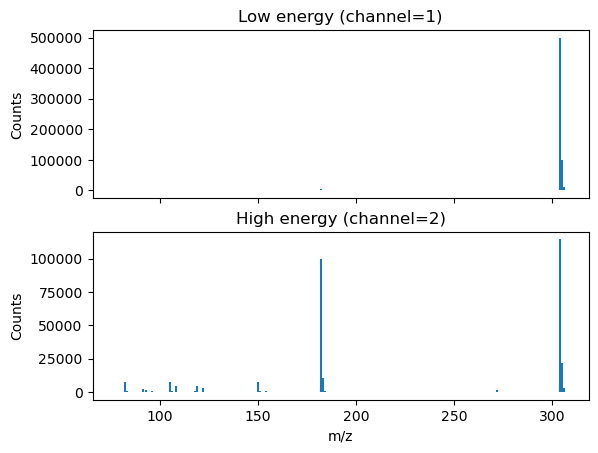

In [8]:
#extract and plot of low energy and high energy mass spectra at retention time of Cocaine
df = pd.read_sql(f"""
    select retentionTime, accurateM_z, counts, channel
        from peaks p
        join samples s on s.sampleId=p.sampleId
        where abs(retentionTime-{rt})<0.003
        """, con=con)
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].title.set_text('Low energy (channel=1)')
ax[1].title.set_text('High energy (channel=2)')
ax[0].vlines(x = df.query('channel==1')['accurateM_z'], ymin=0, ymax=df.query('channel==1')['counts'])
ax[1].vlines(x = df.query('channel==2')['accurateM_z'], ymin=0, ymax=df.query('channel==2')['counts'])
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
plt.xlabel('m/z')
plt.show()

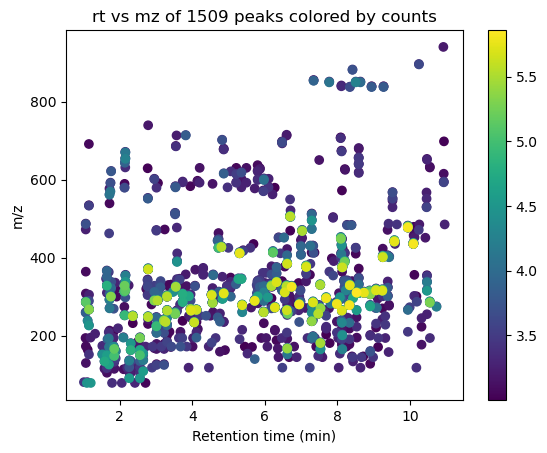

In [9]:
#simple plot of all peaks in injection between rt=1 and 11 min with counts>1000 with logscale of counts
df = pd.read_sql(f"""
    select retentionTime, accurateM_z, counts
        from peaks p
        join samples s on s.sampleId=p.sampleId
        where channel=1 and retentionTime>1 and retentionTime<11 and counts>1000
        and s.samplename='System Control'
        order by counts
        """, con=con)
df['log_counts'] = np.log10(df['counts'])
fig = plt.scatter(x=df['retentionTime'], y=df['accurateM_z'], c=df['log_counts']);
plt.colorbar(fig)
plt.xlabel('Retention time (min)')
plt.ylabel('m/z')
plt.title(f'rt vs mz of {len(df)} peaks colored by counts')
plt.show()